# CDS6314 Data Mining Assignment – Group TT2L_G2

# Association Rule Mining on Marital Satisfaction Dataset

### Members: 
#### 242UC24514 Melvin Siaw Jian Cheng, 
#### 242UC24512 Chong Jien Sheng, 
#### 242UC24515 Tong Jian Hao, 
#### 1191202487 Ng Siew Yang

### Imports & Load Data

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

df = pd.read_csv('Marital-satisfaction_Data (1).csv')
df.columns = df.columns.str.strip()  # remove trailing spaces

In [88]:
import pandas as pd

df = pd.read_csv("Marital-satisfaction_Data (1).csv")
df.head()

,Country,Gender,Age,Marriage_years,children,brought_up_children,Education,Material_status,Religion,Religiosity,...,KMSS2,KMSS3,Scale1,Scale2,Scale3,Scale4,Scale5,Scale6,Scale7,Scale8
0,Brazil,1,21.0,2.0,0,0,5,0,1.0,4,...,7,7,1,1,1,1,1,1,1,1
1,Brazil,1,29.0,3.0,1,0,5,3,1.0,6,...,6,6,2,1,1,1,1,1,1,1
2,Brazil,1,30.0,7.0,0,0,5,3,1.0,4,...,7,7,2,1,2,1,1,1,1,1
3,Brazil,1,30.0,7.0,1,1,5,3,1.0,6,...,6,6,3,1,1,2,1,1,1,1
4,Brazil,1,28.0,9.0,0,0,4,2,1.0,5,...,6,7,3,2,3,2,1,1,1,1


In [89]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7178 entries, 0 to 7177
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              7178 non-null   object 
 1   Gender               7178 non-null   int64  
 2   Age                  7178 non-null   float64
 3   Marriage_years       7178 non-null   float64
 4   children             7178 non-null   int64  
 5   brought_up_children  7178 non-null   int64  
 6   Education            7178 non-null   int64  
 7   Material_status      7178 non-null   int64  
 8   Religion             7092 non-null   float64
 9   Religiosity          7178 non-null   int64  
 10  Pension              7178 non-null   int64  
 11  Love1                7178 non-null   int64  
 12  happy                7178 non-null   int64  
 13  Esteem1              7178 non-null   int64  
 14  Love2                7178 non-null   int64  
 15  Love3                7178 non-null   i

Country                 0
Gender                  0
Age                     0
Marriage_years          0
children                0
brought_up_children     0
Education               0
Material_status         0
Religion               86
Religiosity             0
Pension                 0
Love1                   0
happy                   0
Esteem1                 0
Love2                   0
Love3                   0
Esteem2                 0
self_R                  0
Love4                   0
Love5                   0
KMSS1                   0
KMSS2                   0
KMSS3                   0
Scale1                  0
Scale2                  0
Scale3                  0
Scale4                  0
Scale5                  0
Scale6                  0
Scale7                  0
Scale8                  0
dtype: int64

In [90]:
print(df.columns.tolist())

['Country ', 'Gender', 'Age', 'Marriage_years', 'children', 'brought_up_children', 'Education', 'Material_status', 'Religion', 'Religiosity', 'Pension', 'Love1', 'happy', 'Esteem1', 'Love2', 'Love3', 'Esteem2', 'self_R', 'Love4', 'Love5', 'KMSS1', 'KMSS2', 'KMSS3', 'Scale1', 'Scale2', 'Scale3', 'Scale4', 'Scale5', 'Scale6', 'Scale7', 'Scale8']


In [91]:
df["satisfaction_total"] = df[["KMSS1", "KMSS2", "KMSS3"]].sum(axis=1)

In [92]:
def label_satisfaction(score):
    if score >= 5:
        return "High"
    elif score <= 3:
        return "Low"
    else:
        return "Neutral"

In [93]:
df["satisfaction_label"] = df["satisfaction_total"].apply(label_satisfaction)
df = df[df["satisfaction_label"] != "Neutral"]  # Optional: drop neutral for binary classification

In [94]:
selected_features = [
    "Gender", "Age", "Marriage_years", "children", "brought_up_children",
    "Education", "Material_status", "Religion", "Religiosity", "Pension",
    "Love1", "happy", "Esteem1", "Love2", "Love3", "Esteem2", "self_R", "Love4", "Love5"
]

In [95]:
X = df[selected_features]
y = df["satisfaction_label"]

In [96]:
print(X.shape, y.shape)
# Convert categorical variables to dummy/indicator variables

(7151, 19) (7151,)


### Encode

In [97]:
from sklearn.preprocessing import LabelEncoder

X_encoded = X.copy()

# Encode non-numeric columns using LabelEncoder
for col in X_encoded.columns:
    if X_encoded[col].dtype == 'object' or X_encoded[col].dtype.name == 'category':
        X_encoded[col] = LabelEncoder().fit_transform(X_encoded[col])

In [98]:
# Fill missing values with median (best practice)
X_encoded = X_encoded.fillna(X_encoded.median(numeric_only=True))

### Train Test Split + Scaling

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded, test_size=0.3, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [100]:
X_encoded.isnull().sum()

Gender                 0
Age                    0
Marriage_years         0
children               0
brought_up_children    0
Education              0
Material_status        0
Religion               0
Religiosity            0
Pension                0
Love1                  0
happy                  0
Esteem1                0
Love2                  0
Love3                  0
Esteem2                0
self_R                 0
Love4                  0
Love5                  0
dtype: int64

In [101]:
X_encoded = X_encoded.fillna(X_encoded.median(numeric_only=True))

### Build Models
#### Naive Bayes, Logistic Regression, Random Forest, XGBoost.

In [102]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC

# Define models
models = {
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(),
   "XGBoost": XGBClassifier(eval_metric='logloss'),
   "SVM": SVC(kernel="rbf", probability=True)
}

# Train and evaluate
results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average="weighted"),
        "Recall": recall_score(y_test, y_pred, average="weighted"),
        "F1 Score": f1_score(y_test, y_pred, average="weighted")
    })

# Show results
results_df = pd.DataFrame(results)
print(results_df)


                 Model  Accuracy  Precision    Recall  F1 Score
0          Naive Bayes  0.918919   0.982177  0.918919  0.945280
1  Logistic Regression  0.983225   0.976896  0.983225  0.977942
2        Random Forest  0.984157   0.979649  0.984157  0.980241
3              XGBoost  0.981361   0.974919  0.981361  0.977308
4                  SVM  0.983691   0.978135  0.983691  0.977584


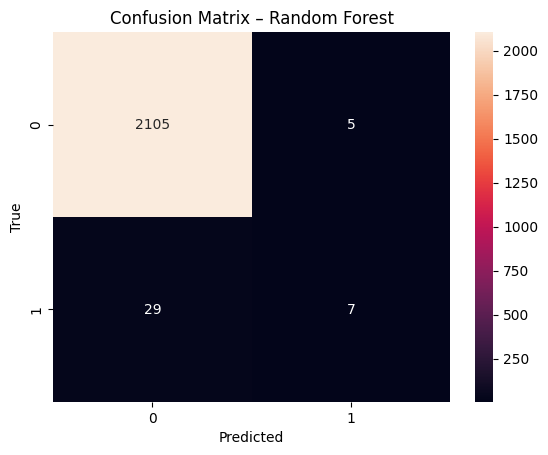

In [103]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

best = models["Random Forest"]      # replace if another is best
y_best_pred = best.predict(X_test_scaled)

cm = confusion_matrix(y_test, y_best_pred, labels=best.classes_)
sns.heatmap(cm, annot=True, fmt="d", 
            xticklabels=best.classes_, 
            yticklabels=best.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix – Random Forest")
plt.show()


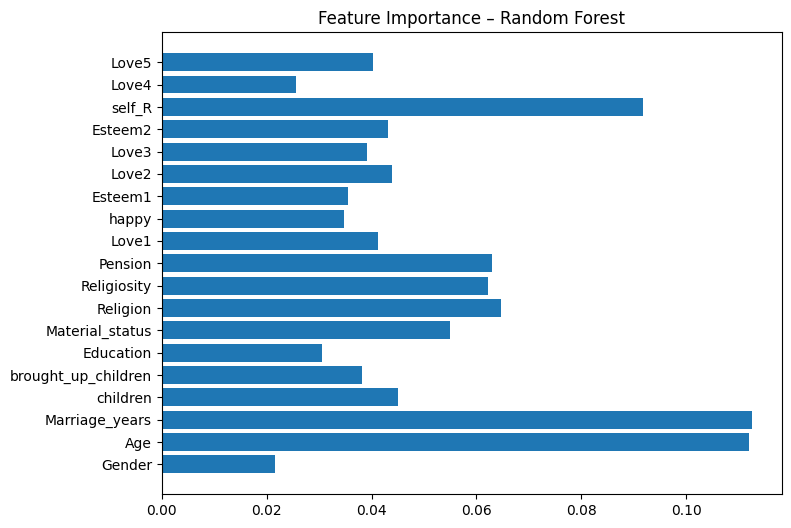

In [104]:
import matplotlib.pyplot as plt

importances = best.feature_importances_
feat_names = X_encoded.columns

plt.figure(figsize=(8,6))
plt.barh(feat_names, importances)
plt.title("Feature Importance – Random Forest")
plt.show()
